In [27]:
import numpy as np

In [1]:
import json
with open('../artifacts/kaggle.json', 'r') as file:
    data = json.load(file)

In [2]:
data

{'username': 'polxvbn', 'key': '63a9770ed389866938b8666bc77dd1ba'}

In [3]:
import os
os.environ['KAGGLE_USERNAME'] = data['username']
os.environ['KAGGLE_KEY'] = data['key']

In [4]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [5]:
api.dataset_download_files('shafiirajabu/supermarket-inventory-dataset', path = '../artifacts/')

Dataset URL: https://www.kaggle.com/datasets/shafiirajabu/supermarket-inventory-dataset


In [4]:
import zipfile
with zipfile.ZipFile('../artifacts/supermarket-inventory-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('../artifacts/')

# Perform EDA(Exploratory data analysis)

In [6]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import seaborn as sns

In [51]:
data = pd.read_excel("../artifacts/supermarket_inventory_data2.xlsx")

In [9]:
data.head()

,Date,ProductID,ProductName,Category,Supplier,UnitPrice,StockQuantity,StockValue,ReorderLevel,ReorderQuantity,UnitsSold,SalesValue,LastSoldDate,LastRestockDate,NextRestockDate,DeliveryTimeDays,DeliveryStatus
0,2024-03-09,a8cf4d43-f0fc-43b0-a6f6-74f30b13b5db,Juice,Beverages,Mcdowell Group,89.94,55,4946.70,34,47,4,359.76,2024-04-18,2024-06-10,2024-07-04,9,On Time
1,2024-03-12,9740c875-68c3-4909-8f88-8069bf5ab35b,Bread,Bakery,"Nunez, Miles and Palmer",9.82,189,1855.98,12,22,5,49.10,2024-06-12,2024-06-22,2024-06-29,3,On Time
2,2024-01-23,98434ac8-5c4d-42c7-a26d-48c35f4849c9,Granola Bars,Snacks,Johnson-Vincent,48.66,130,6325.80,29,24,19,924.54,2024-04-29,2024-05-19,2024-05-28,7,Delayed
3,2024-03-27,438b285c-839f-413a-9d5d-6dc8d24a7a8d,Cream,Dairy,Key-Shah,54.87,96,5267.52,27,20,65,3566.55,2024-05-31,2024-02-24,2024-02-27,3,Partial Delivery
4,2024-01-21,45dd839a-911a-4c87-8217-5052b6a2c7aa,Potato,Produce,Jones Ltd,49.69,109,5416.21,9,66,11,546.59,2024-03-01,2024-05-25,2024-06-12,10,Partial Delivery


In [10]:
data.tail()

,Date,ProductID,ProductName,Category,Supplier,UnitPrice,StockQuantity,StockValue,ReorderLevel,ReorderQuantity,UnitsSold,SalesValue,LastSoldDate,LastRestockDate,NextRestockDate,DeliveryTimeDays,DeliveryStatus
9995,2024-03-30,4f64216a-538c-449c-9ace-f63146dd60e5,Trash Bags,Cleaning Supplies,Knight-Price,91.16,50,4558.00,14,25,3,273.48,2024-02-19,2024-03-26,2024-04-16,4,On Time
9996,2024-01-22,bc9a8e8a-dd70-49be-a9ab-1bead5777abd,Milk,Dairy,"Hamilton, Fields and Nguyen",10.14,14,141.96,39,71,1,10.14,2024-01-04,2024-02-05,2024-02-19,9,Partial Delivery
9997,2024-01-23,1d0a072a-09af-4497-8061-89be604dceeb,Fish,Meat,Hines-Hamilton,58.40,79,4613.60,28,42,26,1518.40,2024-01-07,2024-01-28,2024-02-04,4,On Time
9998,2024-05-24,74563795-7be6-40c2-9f43-56be3bc515c6,Ice Cream,Frozen,"Boyer, Riley and Gonzalez",25.55,160,4088.00,10,66,15,383.25,2024-03-01,2024-03-13,2024-04-08,9,Partial Delivery
9999,2024-04-09,bb8f23c9-1680-46d0-ac28-5cec04986aa3,Fish,Meat,Williams Ltd,44.92,129,5794.68,24,64,44,1976.48,2024-02-18,2024-04-22,2024-04-24,8,Delayed


In [13]:
data.describe()

,UnitPrice,StockQuantity,StockValue,ReorderLevel,ReorderQuantity,UnitsSold,SalesValue,DeliveryTimeDays
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,50.500906,104.925100,5273.269352,27.496300,59.942800,52.368700,2634.076751,5.491700
std,28.596298,55.231887,4342.975118,13.428068,23.494811,43.903864,2939.439198,2.897408
min,1.000000,10.000000,13.000000,5.000000,20.000000,0.000000,0.000000,1.000000
25%,25.940000,57.000000,1700.850000,16.000000,40.000000,16.000000,505.055000,3.000000
50%,50.710000,105.000000,4112.900000,28.000000,60.000000,40.000000,1557.170000,6.000000
75%,74.962500,153.000000,7873.650000,39.000000,80.000000,79.000000,3724.807500,8.000000
max,99.930000,200.000000,19920.000000,50.000000,100.000000,195.000000,17755.360000,10.000000


In [14]:
data.shape

(10000, 17)

In [15]:
data.columns

Index(['Date', 'ProductID', 'ProductName', 'Category', 'Supplier', 'UnitPrice',
       'StockQuantity', 'StockValue', 'ReorderLevel', 'ReorderQuantity',
       'UnitsSold', 'SalesValue', 'LastSoldDate', 'LastRestockDate',
       'NextRestockDate', 'DeliveryTimeDays', 'DeliveryStatus'],
      dtype='object')

In [16]:
data.nunique()

Date                  182
ProductID           10000
ProductName            45
Category                9
Supplier             8641
UnitPrice            6354
StockQuantity         191
StockValue           9822
ReorderLevel           46
ReorderQuantity        81
UnitsSold             196
SalesValue           9598
LastSoldDate          182
LastRestockDate       182
NextRestockDate       211
DeliveryTimeDays       10
DeliveryStatus          3
dtype: int64

In [17]:
data['ProductName'].unique()

array(['Juice', 'Bread', 'Granola Bars', 'Cream', 'Potato', 'Pizza',
       'Beef', 'Croissant', 'Frozen Vegetables', 'Toothpaste', 'Soda',
       'Cheese', 'Fish', 'Yogurt', 'Lettuce', 'Milk', 'Glass Cleaner',
       'Body Lotion', 'Deodorant', 'Lamb', 'Chicken', 'Laundry Detergent',
       'Water', 'Carrot', 'Popcorn', 'Shampoo', 'Bagel', 'Butter', 'Tea',
       'Trash Bags', 'Chips', 'Apple', 'Cake', 'Dish Soap', 'Pork',
       'Coffee', 'Banana', 'Fish Sticks', 'Sponges', 'Candy',
       'Hand Sanitizer', 'Cookies', 'Muffin', 'Ice Cream',
       'Chicken Nuggets'], dtype=object)

# cleaning the data

In [18]:
data.isnull().sum()

Date                  0
ProductID             0
ProductName           0
Category              0
Supplier              0
UnitPrice             0
StockQuantity         0
StockValue            0
ReorderLevel          0
ReorderQuantity       0
UnitsSold             0
SalesValue            0
LastSoldDate        151
LastRestockDate       0
NextRestockDate       0
DeliveryTimeDays      0
DeliveryStatus        0
dtype: int64

In [20]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


<Axes: >

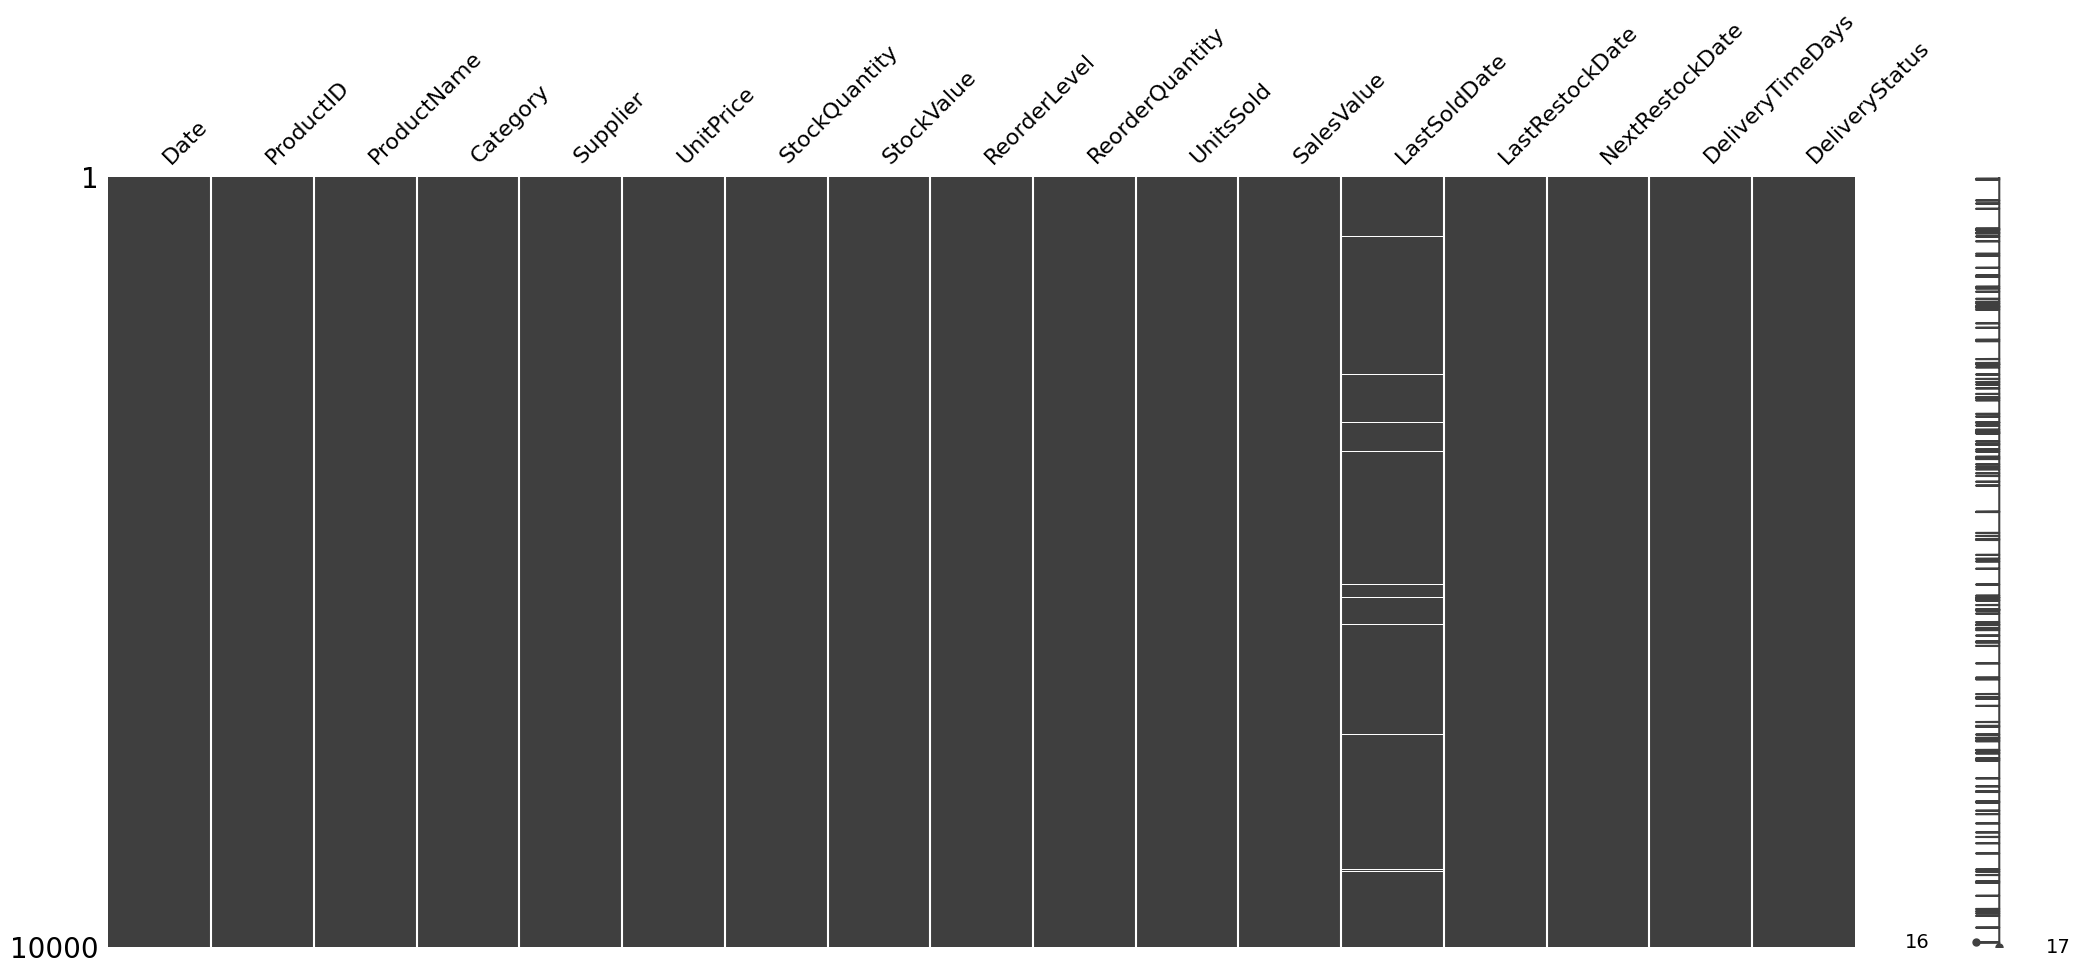

In [21]:
import missingno as msno
msno.matrix(data)

In [22]:
data.dropna(subset=['LastSoldDate'], inplace=True)

In [23]:
data.isnull().sum()

Date                0
ProductID           0
ProductName         0
Category            0
Supplier            0
UnitPrice           0
StockQuantity       0
StockValue          0
ReorderLevel        0
ReorderQuantity     0
UnitsSold           0
SalesValue          0
LastSoldDate        0
LastRestockDate     0
NextRestockDate     0
DeliveryTimeDays    0
DeliveryStatus      0
dtype: int64

In [24]:
sales = data.drop(['DeliveryTimeDays', 'DeliveryStatus'], axis=1)

In [25]:
sales.head()

,Date,ProductID,ProductName,Category,Supplier,UnitPrice,StockQuantity,StockValue,ReorderLevel,ReorderQuantity,UnitsSold,SalesValue,LastSoldDate,LastRestockDate,NextRestockDate
0,2024-03-09,a8cf4d43-f0fc-43b0-a6f6-74f30b13b5db,Juice,Beverages,Mcdowell Group,89.94,55,4946.70,34,47,4,359.76,2024-04-18,2024-06-10,2024-07-04
1,2024-03-12,9740c875-68c3-4909-8f88-8069bf5ab35b,Bread,Bakery,"Nunez, Miles and Palmer",9.82,189,1855.98,12,22,5,49.10,2024-06-12,2024-06-22,2024-06-29
2,2024-01-23,98434ac8-5c4d-42c7-a26d-48c35f4849c9,Granola Bars,Snacks,Johnson-Vincent,48.66,130,6325.80,29,24,19,924.54,2024-04-29,2024-05-19,2024-05-28
3,2024-03-27,438b285c-839f-413a-9d5d-6dc8d24a7a8d,Cream,Dairy,Key-Shah,54.87,96,5267.52,27,20,65,3566.55,2024-05-31,2024-02-24,2024-02-27
4,2024-01-21,45dd839a-911a-4c87-8217-5052b6a2c7aa,Potato,Produce,Jones Ltd,49.69,109,5416.21,9,66,11,546.59,2024-03-01,2024-05-25,2024-06-12


In [29]:
from scipy.stats import zscore

# Compute Z-score for all numeric columns
numeric_cols = sales.select_dtypes(include=[np.number]).columns  # Select only numeric columns
z_scores = np.abs(zscore(data[numeric_cols]))  # Compute absolute Z-score

# Identify rows where any column has a Z-score > 3
outlier_rows = (z_scores > 3).any(axis=1)  

# Get outlier data
outliers = sales[outlier_rows]
print(outliers)


            Date                             ProductID ProductName  \
7     2024-06-15  1d6d75c7-a057-4429-80cb-428753258929   Croissant   
54    2024-05-26  ea702864-29ff-4d42-ab99-fec4459ea124   Dish Soap   
63    2024-03-09  b5a289c9-9a10-4ad7-bf4c-db59922bdca4       Apple   
129   2024-03-08  151ff5cb-e86d-48ab-b1f4-4b4e25ef22e1   Deodorant   
143   2024-05-26  c5c9674b-2294-47e9-8581-159d3155187d      Yogurt   
...          ...                                   ...         ...   
9863  2024-04-22  7b2e0972-68a8-4060-a77c-fe79ea233f00   Croissant   
9883  2024-03-23  1f78cfa6-6183-49fe-adc8-e40836db0d9f     Shampoo   
9894  2024-04-04  23d2d796-5d73-4bb4-8700-9ce3bd5082d2       Cream   
9917  2024-05-15  5eb5ca20-391d-47fd-8e38-96008d02b14f      Muffin   
9981  2024-02-19  f4df8371-e7dc-4c6b-a466-2bfaadb012f4     Sponges   

               Category                     Supplier  UnitPrice  \
7                Bakery     Hobbs, Molina and Butler      90.12   
54    Cleaning Supplies  

In [30]:
outliers.count()

Date               233
ProductID          233
ProductName        233
Category           233
Supplier           233
UnitPrice          233
StockQuantity      233
StockValue         233
ReorderLevel       233
ReorderQuantity    233
UnitsSold          233
SalesValue         233
LastSoldDate       233
LastRestockDate    233
NextRestockDate    233
dtype: int64

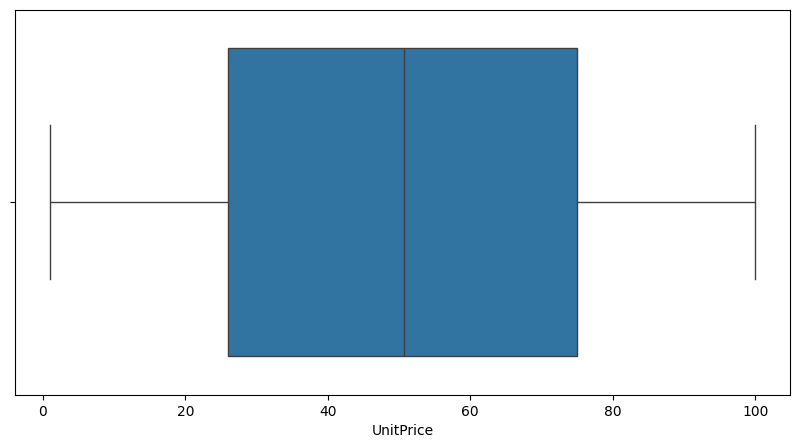

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.boxplot(x=data['UnitPrice'])
plt.show()

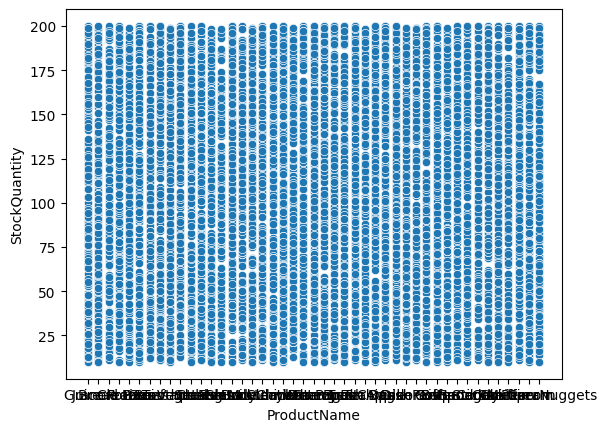

In [39]:
sns.scatterplot(x=sales['ProductName'], y=data['StockQuantity'])
plt.show()

# Relationship analysis

In [38]:
#corelation = sales.corr()

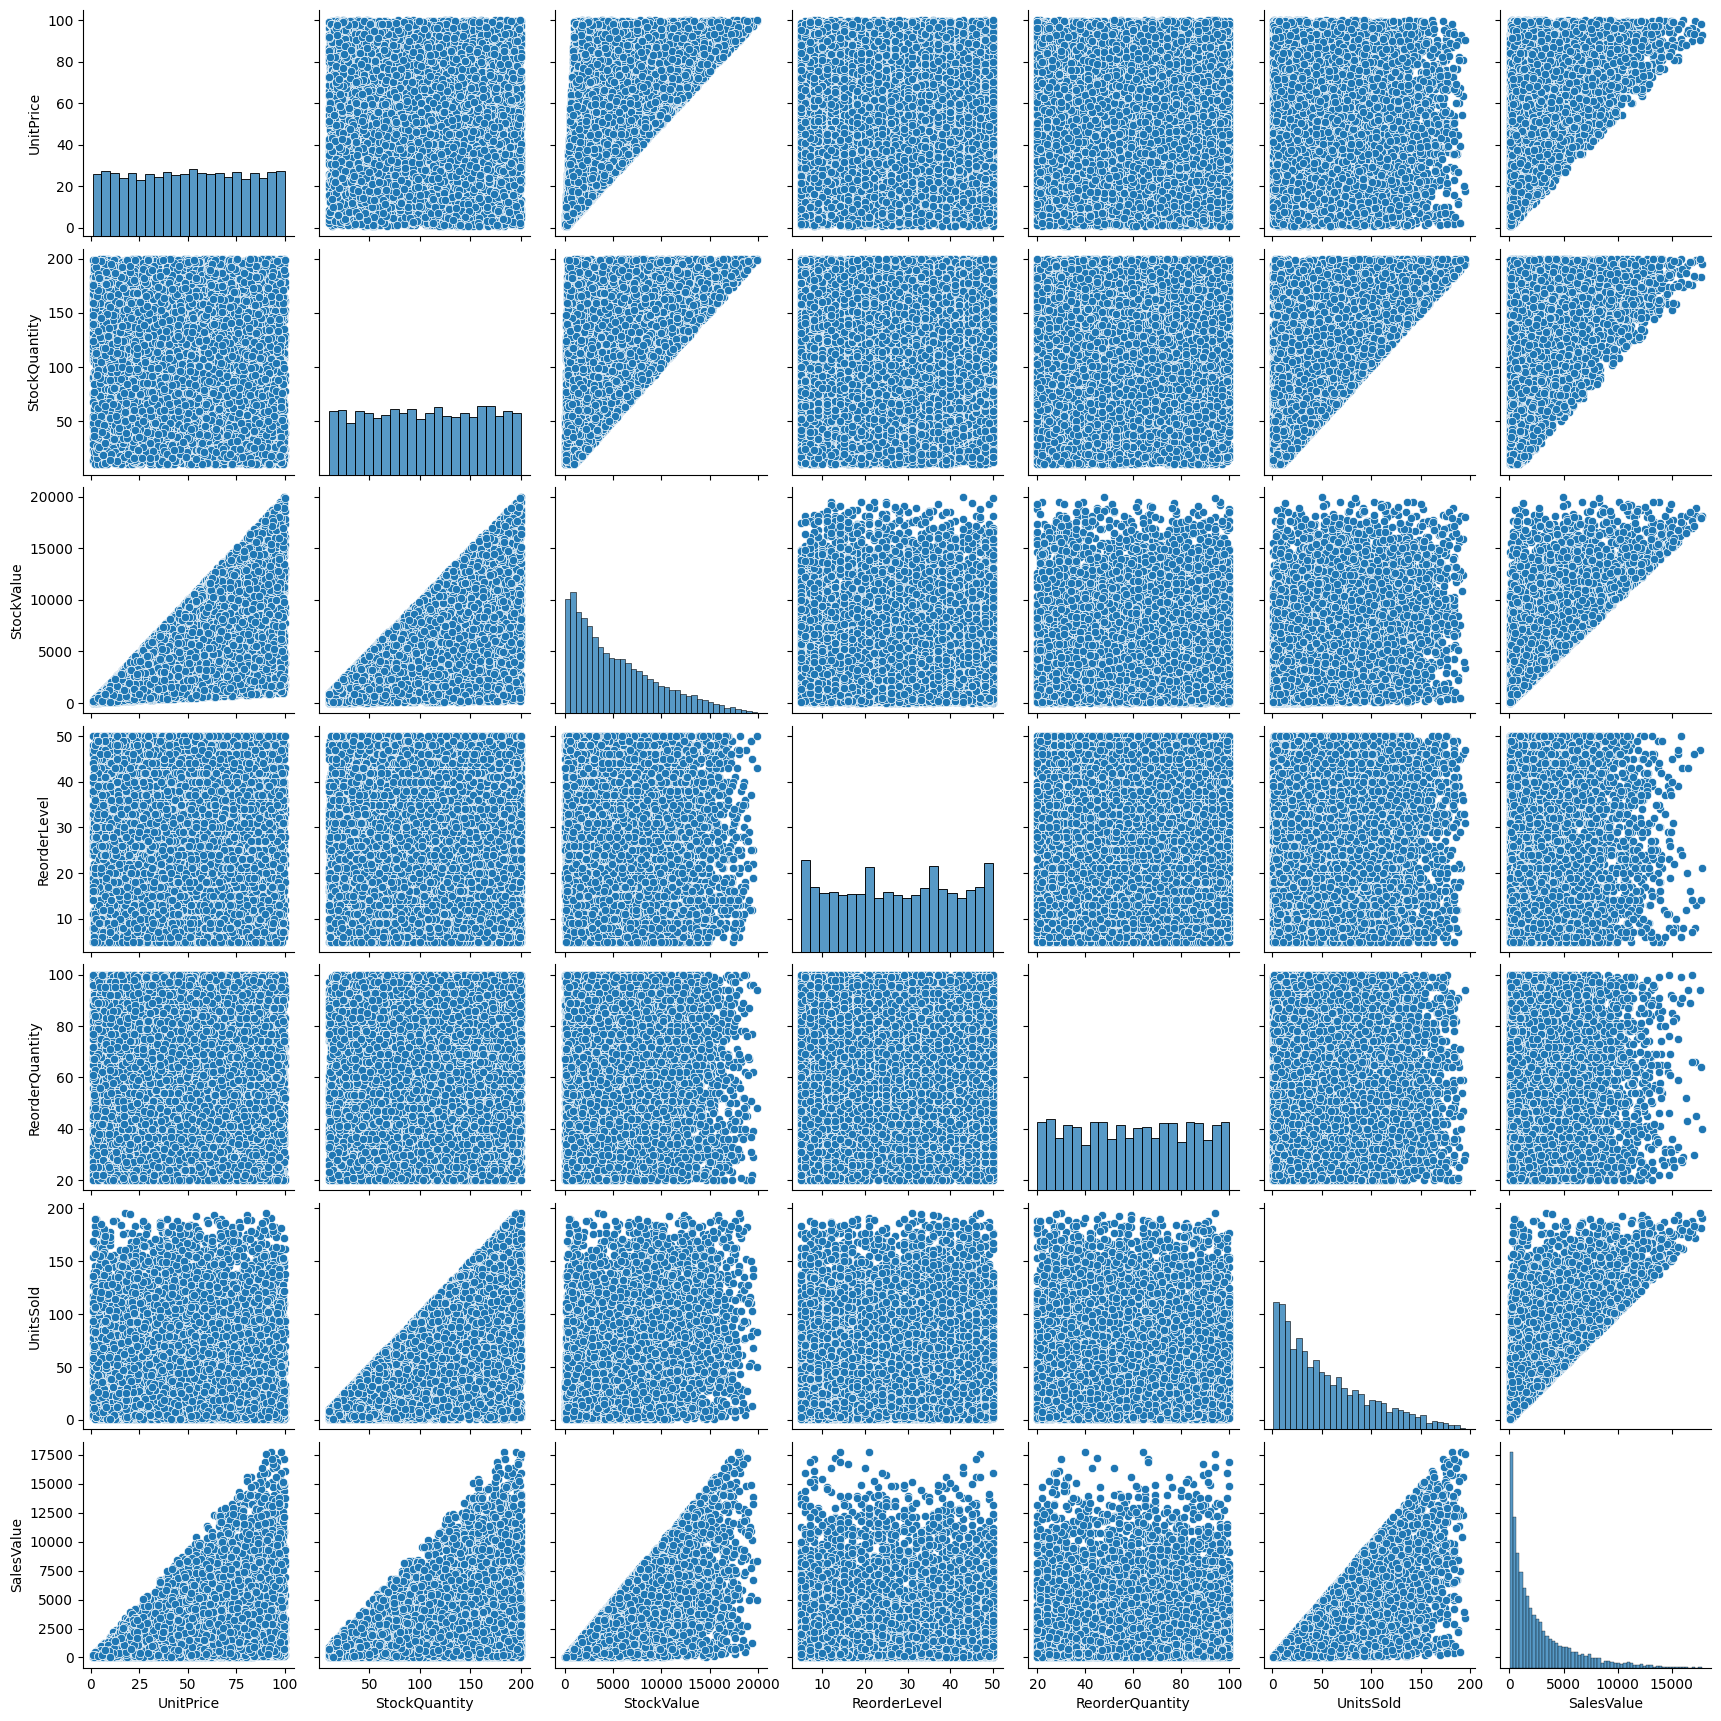

In [40]:
sns.pairplot(sales)

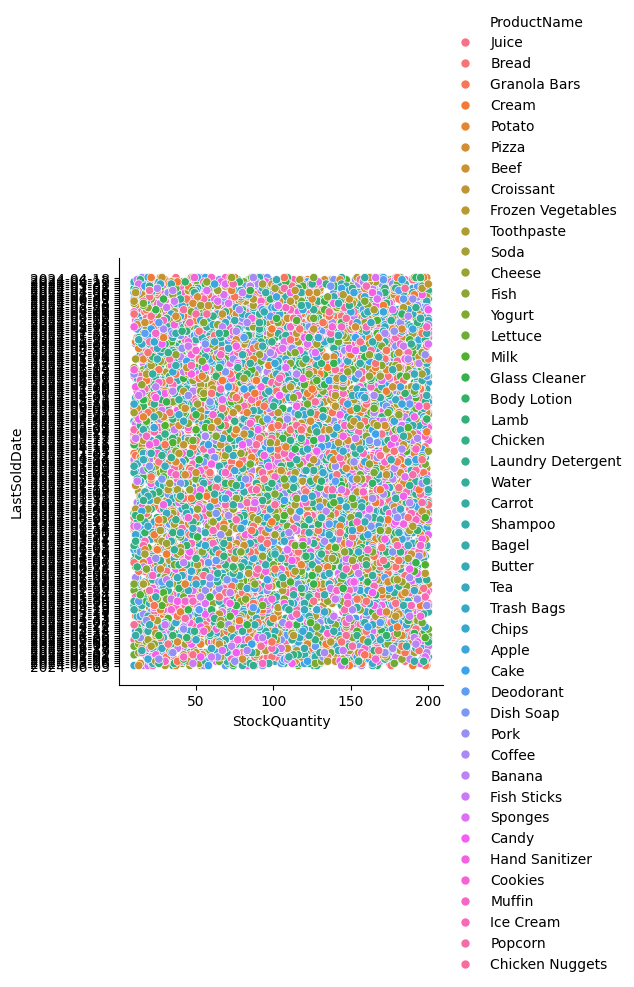

In [42]:
sns.relplot(x = 'StockQuantity', y= 'LastSoldDate', hue = 'ProductName', data = sales)

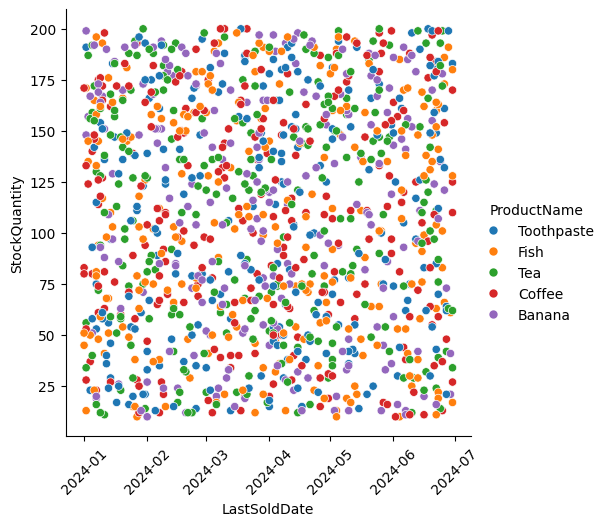

In [ ]:
# Define the threshold: Top 5 most sold products
top_n = 5  # Change this as needed

# Find the top N most sold products
top_products = sales.groupby('ProductName')['UnitsSold'].sum().nlargest(top_n).index

# Filter data to include only these products
filtered_data = sales[sales['ProductName'].isin(top_products)]

# Convert LastSoldDate to datetime if not already
filtered_data.loc[:,'LastSoldDate'] = pd.to_datetime(filtered_data['LastSoldDate'])

# Create the scatter plot
sns.relplot(x='LastSoldDate', y='StockQuantity', hue='ProductName', data=filtered_data)

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()


<Axes: xlabel='LastRestockDate', ylabel='Count'>

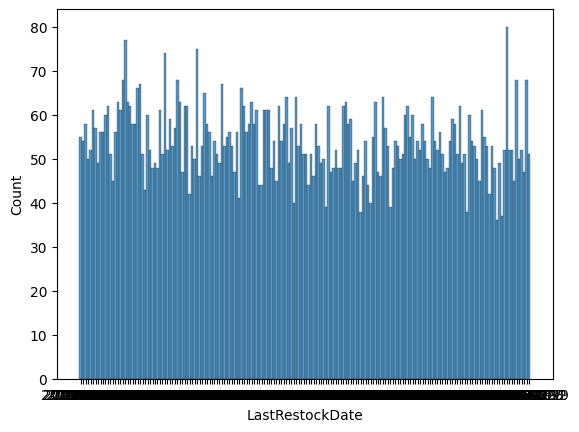

In [50]:
sns.histplot(sales['LastRestockDate'], bins=5)